In [1]:
#this program verfiies all changes in zumi.py 1.1
from zumi.zumi import Zumi
zumi = Zumi() 

for i in range(1):
    print(zumi.compass.get_data())

 Starting Zumi 
Pi Zero I2C is available
Gyro offset file already exists.
Verified Pi Zero is the same
Gyroscope previously calibrated
Zumi board detected
Compass detected
OLED Screen detected
Gyroscope & Accelerometer detected
[-1242, 1360, 3726, 774]


In [2]:
zumi.check_i2c_sensors()
#you must run this compass code in another cell 
#since calling the zumi object again will result in it returning none
#to fix this restart the kernel.
for i in range(100):
    print(zumi.compass.get_bearing())

Zumi board detected
Compass detected
OLED Screen detected
Gyroscope & Accelerometer detected
132.60005384061614
132.4462468833511
132.27786417037353
132.47807012852448
131.94331300401393
132.51044707800085
132.56287660470943
132.630025478022
132.37605991583183
132.34373790139176
132.54371761162037
132.5571603437423
132.56287660470943
132.51044707800085
132.03906386583625
132.6775737017628
132.53529263945998
132.4034308708907
132.32918126914257
132.23583809108644
132.45666807779173
132.30519674543692
132.03373012748352
132.28836410480656
132.2522716253953
132.82412119191827
132.77517561788602
132.9294390318053
132.38334586648918
132.35745470593528
132.0171704681367
132.02684418790196
131.97095112516214
131.84725076905045
132.60005384061614
132.22690306336025
132.28004931461672
132.4034308708907
132.48922070235048
132.28872895987104
132.26943226170982
132.45023185235155
132.2778980624324
131.96847613954762
132.3540387936797
132.68293761412866
132.6223791398475
132.67000157692533
131.7569

In [ ]:
zumi.circle_left()

In [3]:
zumi.compass.set_declination(11.22)

In [4]:
#make sure no magnets are nearby
for i in range(100):
    print(zumi.compass.get_bearing())

143.61349398008397
143.6613575585613
143.84030171367414
143.3619180048099
143.61940523721898
143.1523512036534
143.19130142165943
143.88445752200062
143.65172611148773
143.1867245148226
143.3047776842279
143.59959605648052
143.29375850549977
143.1300220482652
143.25943578835327
143.51631442043478
143.47519191169303
143.65172611148773
143.35108536929084
143.0161666224227
143.5413215740547
143.09945345372043
143.6164611038516
143.25943578835327
143.24347277387304
143.71341053774643
143.87509943794194
143.67181217291534
143.3586850629314
143.4648069679545
143.19814096652055
143.55145722771883
143.5060768361439
143.0498006367813
142.93524813382038
143.5101811524416
143.3348553467796
143.00889489442474
143.5101811524416
143.4072763044642
142.96879667230013
143.49576148599996
143.24823735181684
143.1867245148226
143.00889489442474
143.04258304525723
143.0498006367813
143.6164611038516
143.1798331830649
143.0845285128998
143.1798331830649
143.62036348963122
143.22091306454482
143.671812172915

In [5]:
import matplotlib.pyplot as plt
import time
from zumi.zumi import Zumi
zumi = Zumi() 
zumi.compass.set_declination(11+22/60)

time_start = time.time()

time_list = []
angle_list = []
heading_list = []

print("starting")
for i in range(100):
    time_elapsed = time.time()-time_start
    #zumi.go_straight(40,i*2)
    time_list.append(time_elapsed)
    heading_now = zumi.compass.get_bearing()
    heading_list.append(heading_now)
    z_angle = zumi.update_angles()[2]
    angle_list.append(z_angle)
print("done")
plt.plot(time_list,angle_list,'ro',time_list,heading_list,'bo')
plt.ylabel('angle vs time')
plt.show()

 Starting Zumi 
Pi Zero I2C is available
Gyro offset file already exists.
Verified Pi Zero is the same
Gyroscope previously calibrated
Zumi board detected
Compass detected
OLED Screen detected
Gyroscope & Accelerometer detected
starting
done


<Figure size 640x480 with 1 Axes>

 Starting Zumi 
Pi Zero I2C is available
Gyro offset file already exists.
Verified Pi Zero is the same
Gyroscope previously calibrated
Zumi board detected
Compass detected
OLED Screen detected
Gyroscope & Accelerometer detected
starting
done
200  samples


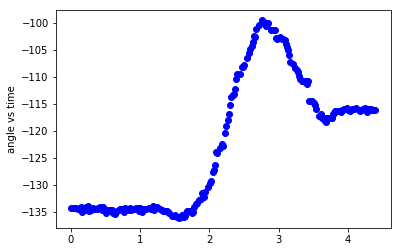

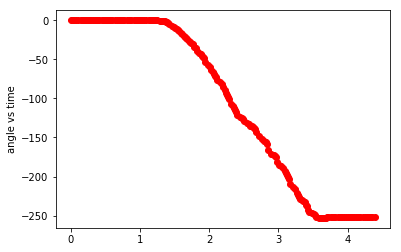

In [10]:
import matplotlib.pyplot as plt
import time
from zumi.zumi import Zumi
zumi = Zumi() 
#zumi.compass.set_declination(11+22/60)

time_start = time.time()

time_list = []
angle_list = []
heading_list = []

print("starting")
for i in range(200):
    time_elapsed = time.time()-time_start
    #zumi.go_straight(40,i*2)
    time_list.append(time_elapsed)
    heading_now = zumi.compass.get_bearing()
    heading_list.append(-1*heading_now)
    z_angle = zumi.update_angles()[2]
    angle_list.append(z_angle)
print("done")
print(len(time_list), " samples")

plt.plot(time_list,heading_list,'bo')
plt.ylabel('angle vs time')
plt.show()

plt.plot(time_list,angle_list,'ro')
plt.ylabel('angle vs time')
plt.show()

start
done


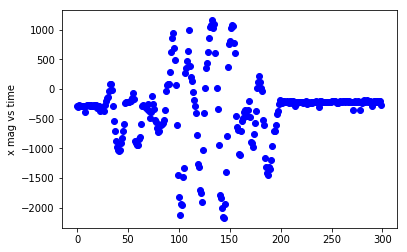

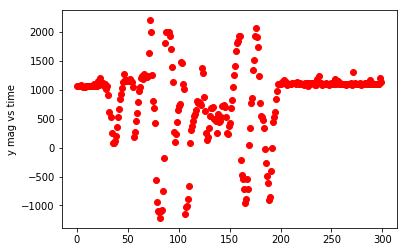

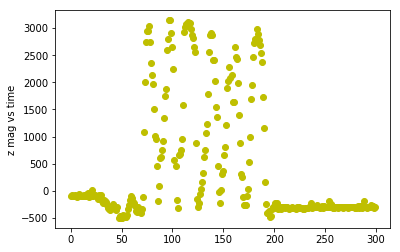

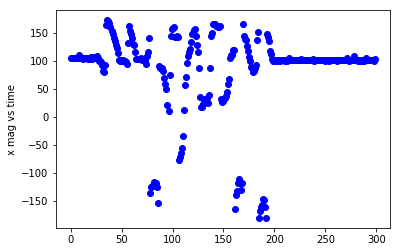

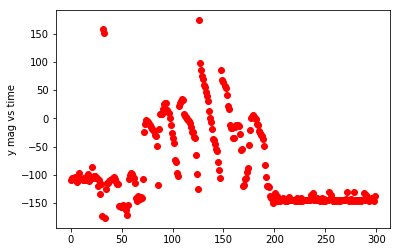

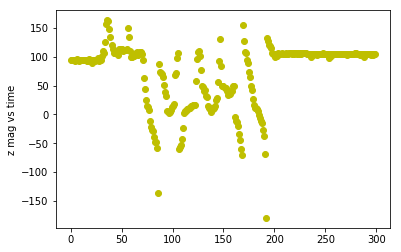

-2170
1157
-1215
2202
-496
3143


In [34]:
import math

compass_list_x = []
compass_list_y = []
compass_list_z = []
compass_x_y = []
compass_x_z = []
compass_y_z = []
print("start")

for i in range(300):
    [x,y,z,t] = zumi.compass.get_data()
    compass_list_x.append(x)
    compass_list_y.append(y)
    compass_list_z.append(z)
    xy = math.degrees(math.atan2(y, x))
    xz = math.degrees(math.atan2(x, z))
    yz = math.degrees(math.atan2(y, z))
    compass_x_y.append(xy)
    compass_x_z.append(xz)
    compass_y_z.append(yz)
    
    
    
print("done")
plt.plot(compass_list_x,'bo')
plt.ylabel('x mag vs time')
plt.show()

plt.plot(compass_list_y,'ro')
plt.ylabel('y mag vs time')
plt.show()

plt.plot(compass_list_z,'yo')
plt.ylabel('z mag vs time')
plt.show()


plt.plot(compass_x_y,'bo')
plt.ylabel('x mag vs time')
plt.show()

plt.plot(compass_x_z,'ro')
plt.ylabel('y mag vs time')
plt.show()

plt.plot(compass_y_z,'yo')
plt.ylabel('z mag vs time')
plt.show()

compass_list_x.sort()
compass_list_y.sort()
compass_list_z.sort()

min_x = compass_list_x[0]
max_x = compass_list_x[-1]

min_y = compass_list_y[0]
max_y = compass_list_y[-1]

min_z = compass_list_z[0]
max_z = compass_list_z[-1]

print(min_x)
print(max_x)

print(min_y)
print(max_y)

print(min_z)
print(max_z)

-896
0
160
1093
28
412


start
done


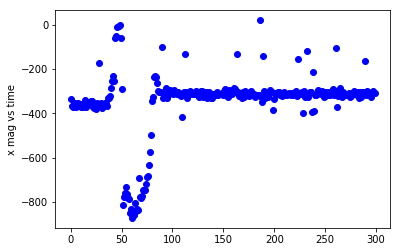

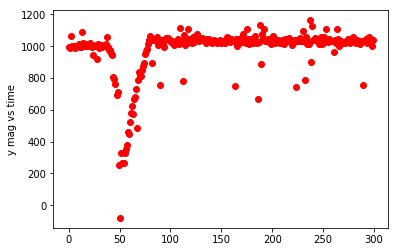

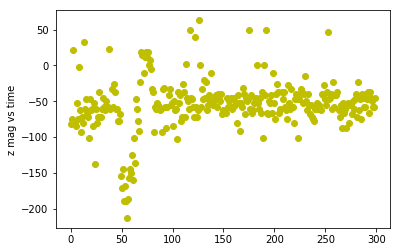

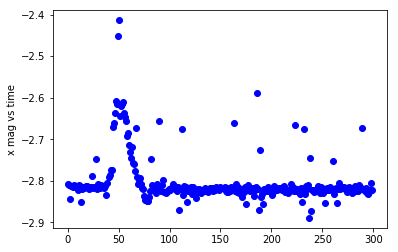

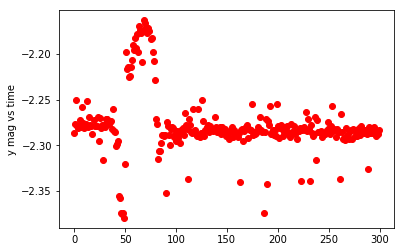

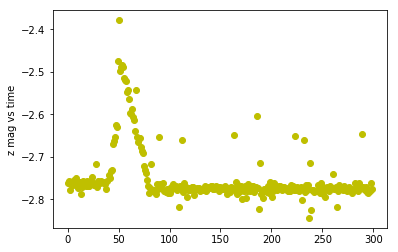

In [38]:
import math

compass_list_x = []
compass_list_y = []
compass_list_z = []
compass_x_y = []
compass_x_z = []
compass_y_z = []

l_x = max_x - min_x
l_y = max_y - min_y
l_z = max_z - min_z


mp_x = (l_x)/2
mp_y = (l_y)/2
mp_z = (l_z)/2

print("start")

for i in range(300):
    [x,y,z,t] = zumi.compass.get_data()
    compass_list_x.append(x)
    compass_list_y.append(y)
    compass_list_z.append(z)
    
    norm_x = (x-mp_x)/l_x
    norm_y = (y-mp_y)/l_y
    norm_z = (z-mp_z)/l_z
    
    xy = (math.atan2(norm_y, norm_x))
    xz = (math.atan2(norm_x, norm_z))
    yz = (math.atan2(norm_y, norm_z))
    compass_x_y.append(xy)
    compass_x_z.append(xz)
    compass_y_z.append(yz)
    
    
    
print("done")
plt.plot(compass_list_x,'bo')
plt.ylabel('x mag vs time')
plt.show()

plt.plot(compass_list_y,'ro')
plt.ylabel('y mag vs time')
plt.show()

plt.plot(compass_list_z,'yo')
plt.ylabel('z mag vs time')
plt.show()


plt.plot(compass_x_y,'bo')
plt.ylabel('x mag vs time')
plt.show()

plt.plot(compass_x_z,'ro')
plt.ylabel('y mag vs time')
plt.show()

plt.plot(compass_y_z,'yo')
plt.ylabel('z mag vs time')
plt.show()

